# Anomalias

Esse script calcula anomalias dos dados da reanálise ERA5 do episódio de ZCAS ocorrido do dia 27 ao 31 de Outubro de 2009.

### Importar os pacotes de funcoes

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

### Load dados do arquivo

In [3]:
ds = xr.open_dataset('wind200.nc')
u200 = ds['u'].values
v200 = ds['v'].values
lat = ds['latitude'].values
lon = ds['longitude'].values
time = ds['time']
time = pd.to_datetime(time.values)

In [4]:
ds = xr.open_dataset('wind500.nc')
u500 = ds['u'].values # vento zonal (Oeste->Leste) (m/s)
v500 = ds['v'].values # vento meridional (Sul->Norte) (m/s)
w500 = ds['w'].values # vento vertical em coordenadas de pressão (ômega, Pa/s)

In [5]:
ds = xr.open_dataset('wind900.nc')
u900 = ds['u'].values
v900 = ds['v'].values

In [15]:
ds = xr.open_dataset('singleLevel.nc')
mslp = ds['msl'].values  # mean sea level pressure (Pa)
mslp = mslp/100          # 100 Pa = 1 hPa
prec = ds['mtpr'].values # mean total precipitation rate (kg m**-2 s**-1 = mm/s)
prec = prec*60*60*24     # 86400  mm/s = 1 mm/dia
role = ds['ttr'].values  # top thermal radiation (toa_outgoing_longwave_flux) (J m**-2 = W s m**-2)
role = - role/(60*60*24) # 86400 W s/m**2 = 1 W dia/m**2

In [17]:
ds = xr.open_dataset('geop500.nc')
ds.info() # visualizar "meta data" (dados sobre os dados)

xarray.Dataset {
dimensions:
	latitude = 281 ;
	longitude = 241 ;
	time = 205 ;

variables:
	float32 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:long_name = longitude ;
	float32 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:long_name = latitude ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
	float32 z(time, latitude, longitude) ;
		z:units = m**2 s**-2 ;
		z:long_name = Geopotential ;
		z:standard_name = geopotential ;

// global attributes:
	:Conventions = CF-1.6 ;
	:history = 2020-06-28 19:23:12 GMT by grib_to_netcdf-2.16.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -S param -o /cache/data4/adaptor.mars.internal-1593372160.0594954-444-7-4b804906-c7fd-4ccd-9d56-391415bf0ae8.nc /cache/tmp/4b804906-c7fd-4ccd-9d56-391415bf0ae8-adaptor.mars.internal-1593372160.0600686-444-2-tmp.grib ;
}



Geopotencial, $\phi = z g$ (m m/s$^2$), onde $z$ é a altura (em metros) e $g$ é a aceleração da gravidade ($\sim$ 9.81 m/s$^2$)

Então a **altura geopotencial** é $z = \phi/g$ 

In [18]:
z500 = ds['z'].values # Geopotential (m**2 s**-2)
z500 = z500/9.81

#### Verificar o tamanho das dimensões das variáveis

In [8]:
time.shape

(205,)

In [9]:
lat.shape

(281,)

In [10]:
lon.shape

(241,)

In [11]:
role.shape # (205 dias, 281 pontos de latitude, 241 pontos de longitude)

(205, 281, 241)

#### Resolução horizontal dos dados

In [12]:
lat[0]-lat[1]

0.25

In [13]:
lon[0]-lon[1]

-0.25

### Climatologias (Médias de Longo Termo)

In [20]:
u200_clima = np.mean(u200, axis=0) # média sobre a primeira dimensao (time)
v200_clima = np.mean(v200, axis=0)
u900_clima = np.mean(u900, axis=0)
v900_clima = np.mean(v900, axis=0)
u500_clima = np.mean(u500, axis=0)
v500_clima = np.mean(v500, axis=0)
z500_clima = np.mean(z500, axis=0)
w500_clima = np.mean(w500, axis=0)
mslp_clima = np.mean(mslp, axis=0)
prec_clima = np.mean(prec, axis=0)
role_clima = np.mean(role, axis=0)

In [15]:
role_clima.shape # (1 média diária, lon, lat)

(281, 241)

### Cálculo das Médias do Episódio de ZCAS

#### Médias das variáveis nos dias de ZCAS do episódio de Outubro de 2009

In [21]:
# Como os dados só contém os dias 27 a 31 de Outubro, basta selecionar o ano.
u200_zcas_dias = u200[np.where(time.year==2009)[0],:,:]
v200_zcas_dias = v200[np.where(time.year==2009)[0],:,:]
u900_zcas_dias = u900[np.where(time.year==2009)[0],:,:]
v900_zcas_dias = v900[np.where(time.year==2009)[0],:,:]
u500_zcas_dias = u500[np.where(time.year==2009)[0],:,:]
v500_zcas_dias = v500[np.where(time.year==2009)[0],:,:]
w500_zcas_dias = w500[np.where(time.year==2009)[0],:,:]
z500_zcas_dias = z500[np.where(time.year==2009)[0],:,:]
mslp_zcas_dias = mslp[np.where(time.year==2009)[0],:,:]
prec_zcas_dias = prec[np.where(time.year==2009)[0],:,:]
role_zcas_dias = role[np.where(time.year==2009)[0],:,:]

In [17]:
role_zcas_dias.shape # (5 dias, lon, lat)

(5, 281, 241)

In [22]:
# Cálculo da média diária do episódio de ZCAS
u200_zcas_mean = np.mean(u200_zcas_dias, axis=0)
v200_zcas_mean = np.mean(v200_zcas_dias, axis=0)
u900_zcas_mean = np.mean(u900_zcas_dias, axis=0)
v900_zcas_mean = np.mean(v900_zcas_dias, axis=0)
u500_zcas_mean = np.mean(u500_zcas_dias, axis=0)
v500_zcas_mean = np.mean(v500_zcas_dias, axis=0)
w500_zcas_mean = np.mean(w500_zcas_dias, axis=0)
z500_zcas_mean = np.mean(z500_zcas_dias, axis=0)
mslp_zcas_mean = np.mean(mslp_zcas_dias, axis=0)
prec_zcas_mean = np.mean(prec_zcas_dias, axis=0)
role_zcas_mean = np.mean(role_zcas_dias, axis=0)

In [19]:
role_zcas_mean.shape # (1 dia, lon, lat)

(281, 241)

### Salvar médias em arquivo

#### Clima

In [20]:
newds = xr.Dataset(data_vars={# Dimensoes
                              'lat' :(["lat"], lat),
                              'lon' : (["lon"], lon),
                              # Variaveis
                              'u200': (["lat","lon"], u200_clima),
                              'v200': (["lat","lon"], v200_clima),
                              'u900': (["lat","lon"], u900_clima),
                              'v900': (["lat","lon"], v900_clima),
                              'u500': (["lat","lon"], u500_clima),
                              'v500': (["lat","lon"], v500_clima),
                              'w500': (["lat","lon"], w500_clima),
                              'z500': (["lat","lon"], z500_clima),
                              'mslp': (["lat","lon"], mslp_clima),
                              'prec': (["lat","lon"], prec_clima),
                              'role': (["lat","lon"], role_clima),})


newds['lat'].attrs  = {'standard_name':'lat','units':'degrees_north', '_CoordinateAxisType':'Lat'}
newds['lon'].attrs  = {'standard_name':'lon','units':'degrees_east',  '_CoordinateAxisType':'Lon'}

newds['u200'].attrs  = {'standard_name':'u200', 'units':'m/s'}
newds['v200'].attrs  = {'standard_name':'v200', 'units':'m/s'}
newds['u900'].attrs  = {'standard_name':'u900', 'units':'m/s'}
newds['v900'].attrs  = {'standard_name':'v900', 'units':'m/s'}
newds['u500'].attrs  = {'standard_name':'u500', 'units':'m/s'}
newds['v500'].attrs  = {'standard_name':'v500', 'units':'m/s'}
newds['z500'].attrs  = {'standard_name':'z500', 'units':'m'}
newds['mslp'].attrs  = {'standard_name':'mslp', 'units':'Pa'}
newds['prec'].attrs  = {'standard_name':'prec', 'units':'mm'}
newds['role'].attrs  = {'standard_name':'role', 'units':'W/m**2'}

newds.attrs = {'conteudo':'Clima Média Diária dos dias 27 a 31 de Outubro, relativo a 1979-2019',
               'dados':'ERA5',
               'contato': 'David Nielsen: davidnielsen@id.uff.br'}
newds.to_netcdf('clima_27a31Out.nc')

#### Média Diária do Episódio

In [21]:
newds = xr.Dataset(data_vars={# Dimensoes
                              'lat' :(["lat"], lat),
                              'lon' : (["lon"], lon),
                               # Variaveis
                              'u200': (["lat","lon"], u200_zcas_mean),
                              'v200': (["lat","lon"], v200_zcas_mean),
                              'u900': (["lat","lon"], u900_zcas_mean),
                              'v900': (["lat","lon"], v900_zcas_mean),
                              'u500': (["lat","lon"], u500_zcas_mean),
                              'v500': (["lat","lon"], v500_zcas_mean),
                              'w500': (["lat","lon"], w500_zcas_mean),
                              'z500': (["lat","lon"], z500_zcas_mean),
                              'mslp': (["lat","lon"], mslp_zcas_mean),
                              'prec': (["lat","lon"], prec_zcas_mean),
                              'role': (["lat","lon"], role_zcas_mean),})

newds['lat'].attrs  = {'standard_name':'lat','units':'degrees_north', '_CoordinateAxisType':'Lat'}
newds['lon'].attrs  = {'standard_name':'lon','units':'degrees_east',  '_CoordinateAxisType':'Lon'}

newds['u200'].attrs  = {'standard_name':'u200', 'units':'m/s'}
newds['v200'].attrs  = {'standard_name':'v200', 'units':'m/s'}
newds['u900'].attrs  = {'standard_name':'u900', 'units':'m/s'}
newds['v900'].attrs  = {'standard_name':'v900', 'units':'m/s'}
newds['u500'].attrs  = {'standard_name':'u500', 'units':'m/s'}
newds['v500'].attrs  = {'standard_name':'v500', 'units':'m/s'}
newds['z500'].attrs  = {'standard_name':'z500', 'units':'m'}
newds['mslp'].attrs  = {'standard_name':'mslp', 'units':'Pa'}
newds['prec'].attrs  = {'standard_name':'prec', 'units':'mm'}
newds['role'].attrs  = {'standard_name':'role', 'units':'W/m**2'}

newds.attrs = {'conteudo':'Média Diária dos dias 27 a 31 de Outubro de 2009',
               'dados':'ERA5',
               'contato': 'David Nielsen: davidnielsen@id.uff.br'}
newds.to_netcdf('zcas_27a31Out2009.nc')

#### Anomalias

In [22]:
newds = xr.Dataset(data_vars={# Dimensoes
                              'lat' :(["lat"], lat),
                              'lon' : (["lon"], lon),
                               # Variaveis
                              'u200': (["lat","lon"], u200_zcas_mean - u200_clima),
                              'v200': (["lat","lon"], v200_zcas_mean - v200_clima),
                              'u900': (["lat","lon"], u900_zcas_mean - u900_clima),
                              'v900': (["lat","lon"], v900_zcas_mean - v900_clima),
                              'u500': (["lat","lon"], u500_zcas_mean - u500_clima),
                              'v500': (["lat","lon"], v500_zcas_mean - v500_clima),
                              'w500': (["lat","lon"], w500_zcas_mean - w500_clima),
                              'z500': (["lat","lon"], z500_zcas_mean - z500_clima),
                              'mslp': (["lat","lon"], mslp_zcas_mean - mslp_clima),
                              'prec': (["lat","lon"], prec_zcas_mean - prec_clima),
                              'role': (["lat","lon"], role_zcas_mean - role_clima)})

newds['lat'].attrs  = {'standard_name':'lat','units':'degrees_north', '_CoordinateAxisType':'Lat'}
newds['lon'].attrs  = {'standard_name':'lon','units':'degrees_east',  '_CoordinateAxisType':'Lon'}

newds['u200'].attrs  = {'standard_name':'u200', 'units':'m/s'}
newds['v200'].attrs  = {'standard_name':'v200', 'units':'m/s'}
newds['u900'].attrs  = {'standard_name':'u900', 'units':'m/s'}
newds['v900'].attrs  = {'standard_name':'v900', 'units':'m/s'}
newds['u500'].attrs  = {'standard_name':'u500', 'units':'m/s'}
newds['v500'].attrs  = {'standard_name':'v500', 'units':'m/s'}
newds['z500'].attrs  = {'standard_name':'z500', 'units':'m'}
newds['mslp'].attrs  = {'standard_name':'mslp', 'units':'Pa'}
newds['prec'].attrs  = {'standard_name':'prec', 'units':'mm'}
newds['role'].attrs  = {'standard_name':'role', 'units':'W/m**2'}

newds.attrs = {'conteudo':'Anomalia Média Diária dos dias 27 a 31 de Outubro de 2009, em relacao a 1979-2019',
               'dados':'ERA5',
               'contato': 'David Nielsen: davidnielsen@id.uff.br'}
newds.to_netcdf('zcas_27a31Out2009_anom.nc')

### Figuras

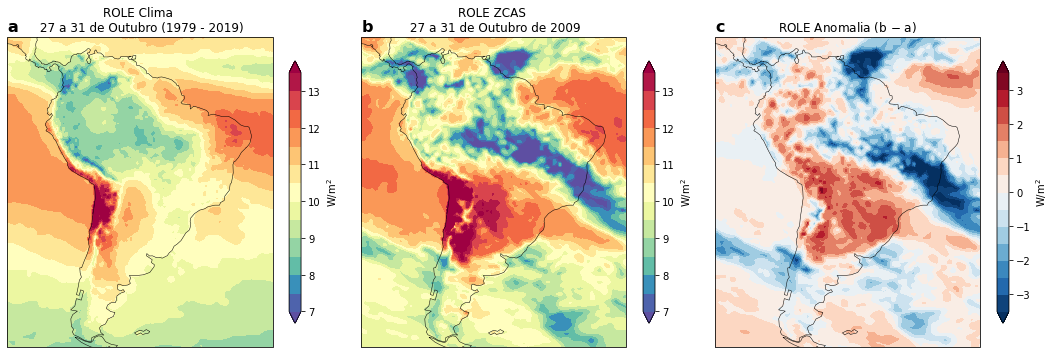

In [13]:
fig=plt.figure(figsize=(15,5))

proj=ccrs.Orthographic(central_longitude=-60, central_latitude=-20, globe=None)
proj=ccrs.PlateCarree()

ax = plt.subplot(131, projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.5)
plt.contourf(lon, lat, role_clima, extend='both', cmap = 'Spectral_r', transform=ccrs.PlateCarree(),
             levels=np.arange(7,14,0.5))
plt.colorbar(orientation='vertical', shrink=0.8, label='W/m$^2$')
plt.title('ROLE Clima \n 27 a 31 de Outubro (1979 - 2019)')
plt.title('a', fontweight='bold', loc='left', fontsize=16)

ax = plt.subplot(132, projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.5)
plt.contourf(lon, lat, role_zcas_mean, extend='both', cmap = 'Spectral_r', transform=ccrs.PlateCarree(),
             levels=np.arange(7,14,0.5))
plt.colorbar(orientation='vertical', shrink=0.8, label='W/m$^2$')
plt.title('ROLE ZCAS \n 27 a 31 de Outubro de 2009')
plt.title('b', fontweight='bold', loc='left', fontsize=16)

ax = plt.subplot(133, projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.5)
plt.contourf(lon, lat, role_zcas_mean - role_clima, extend='both', cmap = 'RdBu_r', transform=ccrs.PlateCarree(),
             levels=np.arange(-3.5,4,0.5))
plt.colorbar(orientation='vertical', shrink=0.8, label='W/m$^2$')
plt.title('ROLE Anomalia (b $-$ a)')
plt.title('c', fontweight='bold', loc='left', fontsize=16)

plt.tight_layout()
plt.show()
fig.savefig('zcas_role.png', dpi=300)
fig.savefig('zcas_role.pdf')